In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")

### Analise

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


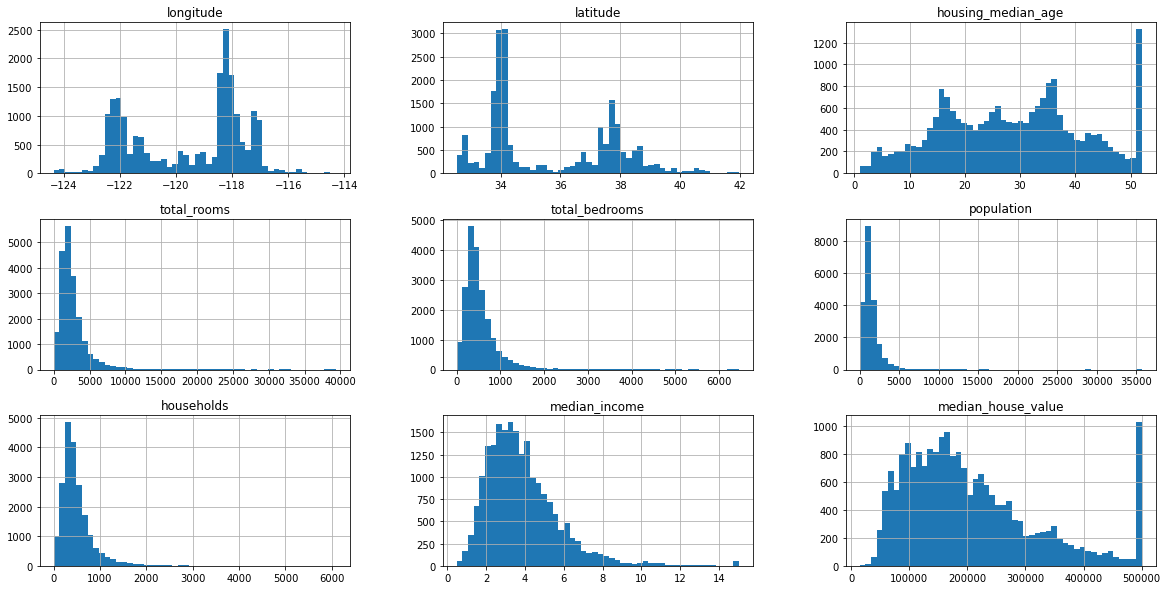

In [5]:
df.hist(figsize=(20,10) , bins= 50)
plt.show()

In [6]:
df.groupby('ocean_proximity').agg(['mean' , 'count'])['median_house_value'].sort_values('mean' , ascending = False)

,mean,count
ocean_proximity,,
ISLAND,380440.000000,5
NEAR BAY,259212.311790,2290
NEAR OCEAN,249433.977427,2658
<1H OCEAN,240084.285464,9136
INLAND,124805.392001,6551


In [7]:
df.corr()["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

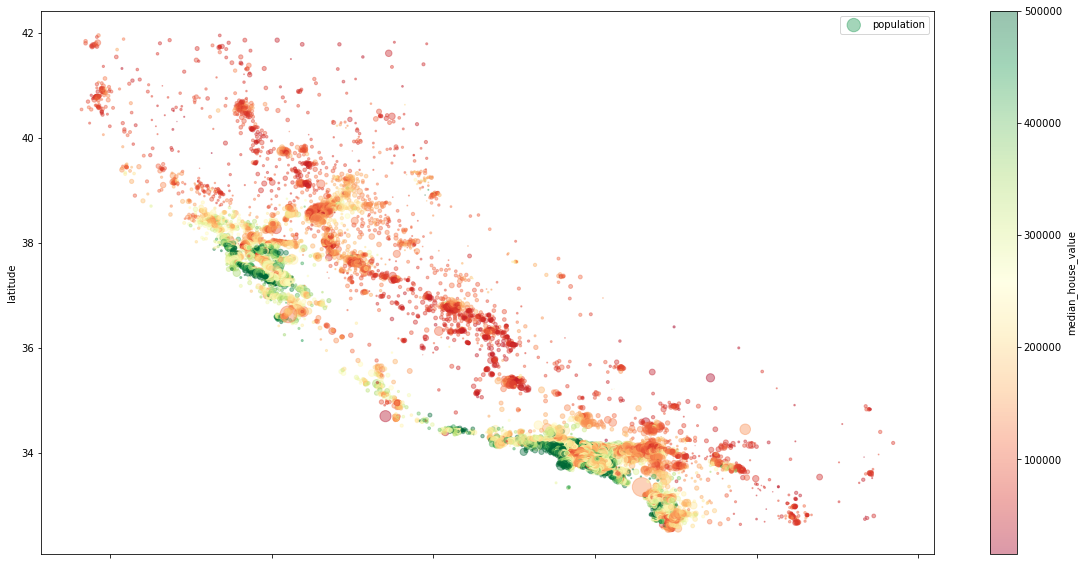

In [8]:
df.plot(kind = "scatter" , x =  'longitude' , y='latitude' , figsize = (20,10) , alpha = 0.4 , s = df["population"]/100 , label = 'population' , 
c='median_house_value', colorbar = True , cmap = plt.get_cmap("RdYlGn"))
plt.legend()

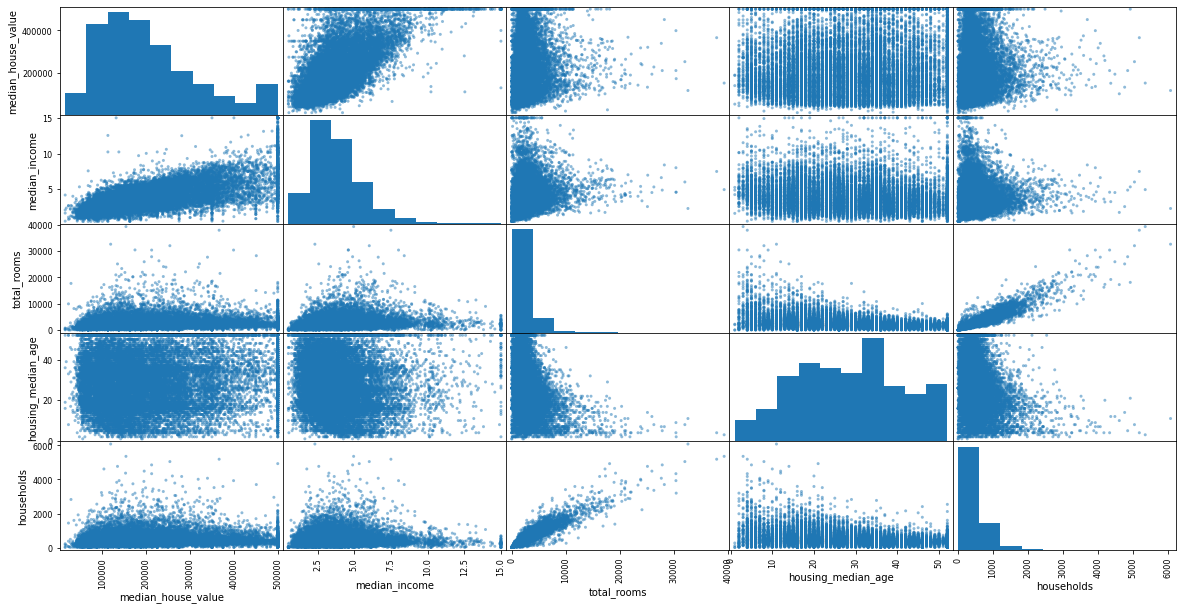

In [9]:
pd.plotting.scatter_matrix(df[['median_house_value' , 'median_income' , 'total_rooms' , 'housing_median_age', 'households'] ] , figsize=(20, 10))
plt.show()

<AxesSubplot:>

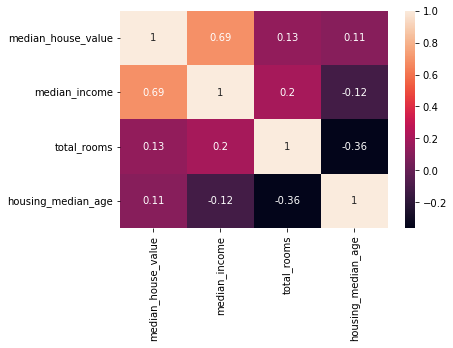

In [10]:
sns.heatmap(df[['median_house_value' , 'median_income' , 'total_rooms' , 'housing_median_age']].corr() , annot= True)

### Combinando variaveis

In [11]:
df['rooms_per_hosehold'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_hosehold'] = df['population'] / df['households']


In [12]:
df.corr()['median_house_value'].sort_values(ascending= False)

median_house_value         1.000000
median_income              0.688075
rooms_per_hosehold         0.151948
total_rooms                0.134153
housing_median_age         0.105623
households                 0.065843
total_bedrooms             0.049686
population_per_hosehold   -0.023737
population                -0.024650
longitude                 -0.045967
latitude                  -0.144160
bedrooms_per_room         -0.255880
Name: median_house_value, dtype: float64

<AxesSubplot:>

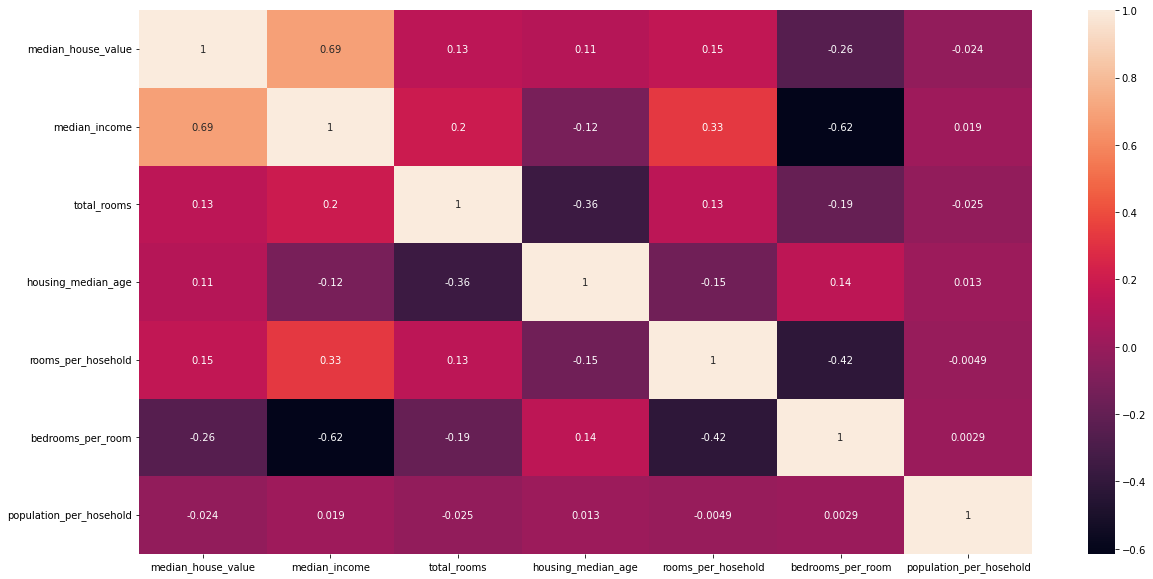

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df[['median_house_value' , 'median_income' , 'total_rooms' , 'housing_median_age' , 'rooms_per_hosehold','bedrooms_per_room' , 'population_per_hosehold' ]].corr() , annot= True)

### Separando as variaveis dos labels

In [14]:
df_variables = df.drop('median_house_value' , axis = 1)
df_labels = df['median_house_value'].copy()

### Limpando os dados

In [15]:
# Colunas com valores null
df_variables.columns[df_variables.isna().any()]

Index(['total_bedrooms', 'bedrooms_per_room'], dtype='object')

In [16]:
(df_variables.isnull().sum() / len(df_variables))*100

longitude                  0.000000
latitude                   0.000000
housing_median_age         0.000000
total_rooms                0.000000
total_bedrooms             1.002907
population                 0.000000
households                 0.000000
median_income              0.000000
ocean_proximity            0.000000
rooms_per_hosehold         0.000000
bedrooms_per_room          1.002907
population_per_hosehold    0.000000
dtype: float64

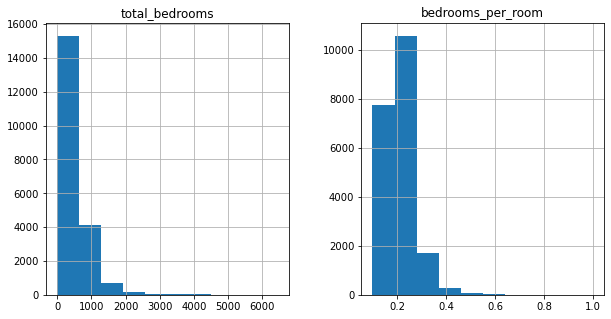

In [17]:
df_variables[['total_bedrooms', 'bedrooms_per_room']].hist(figsize = (10,5))
plt.show()

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [19]:
df_variables.dtypes

longitude                  float64
latitude                   float64
housing_median_age         float64
total_rooms                float64
total_bedrooms             float64
population                 float64
households                 float64
median_income              float64
ocean_proximity             object
rooms_per_hosehold         float64
bedrooms_per_room          float64
population_per_hosehold    float64
dtype: object

In [20]:
df_num = df_variables.drop('ocean_proximity' , axis = 1)

In [21]:
df_num.dtypes

longitude                  float64
latitude                   float64
housing_median_age         float64
total_rooms                float64
total_bedrooms             float64
population                 float64
households                 float64
median_income              float64
rooms_per_hosehold         float64
bedrooms_per_room          float64
population_per_hosehold    float64
dtype: object

In [22]:
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [23]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [24]:
X = imputer.transform(df_num)

In [25]:
df_fin = pd.DataFrame(X, columns = df_num.columns , index = df_num.index)

In [26]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   longitude                20640 non-null  float64
 1   latitude                 20640 non-null  float64
 2   housing_median_age       20640 non-null  float64
 3   total_rooms              20640 non-null  float64
 4   total_bedrooms           20640 non-null  float64
 5   population               20640 non-null  float64
 6   households               20640 non-null  float64
 7   median_income            20640 non-null  float64
 8   rooms_per_hosehold       20640 non-null  float64
 9   bedrooms_per_room        20640 non-null  float64
 10  population_per_hosehold  20640 non-null  float64
dtypes: float64(11)
memory usage: 1.7 MB


### Tratando Variaveis Categoricas

In [27]:
df_variables['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [28]:
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder
ordinal_encoder = OrdinalEncoder()
cat_encoder = OneHotEncoder()

In [29]:
df_cat = cat_encoder.fit_transform(df_variables[['ocean_proximity']])

In [30]:
df_cat = pd.DataFrame(df_cat.toarray() , columns = cat_encoder.categories_)

In [31]:
df_fin = df_fin.join(df_cat)

### Padronização

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
df_pad = scaler.fit_transform(df_fin)

C:\Users\arthu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\arthu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [34]:
df_pad =pd.DataFrame(df_pad , columns= df_fin.columns , index = df_fin.index)

### Treinando o Modelo


#### Preparando o modelo

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train , x_test , y_train , y_test = train_test_split(df_pad , df_labels , test_size= 0.20 , random_state= 42)

#### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score


In [53]:
lin_reg = LinearRegression()
lin_reg.fit(x_train , y_train)

C:\Users\arthu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [54]:
df_pred = lin_reg.predict(x_train)

C:\Users\arthu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [56]:
np.sqrt(mean_squared_error(y_train, df_pred))

67593.20745775253

In [57]:
r2_score(y_train , df_pred)

0.6582199160539229

In [60]:
pd.Series(lin_reg.coef_  , index = x_train.columns).sort_values(ascending= False)

median_income              78719.610316
households                 40377.786850
bedrooms_per_room          16723.464749
housing_median_age         14103.405331
rooms_per_hosehold          7979.427207
total_rooms                 5899.986316
(<1H OCEAN,)                5700.954999
total_bedrooms              5312.569299
(NEAR OCEAN,)               4849.293550
(ISLAND,)                   2213.047047
(NEAR BAY,)                 1895.408385
population_per_hosehold      673.078683
(INLAND,)                 -10926.097131
population                -46133.408510
longitude                 -56216.863868
latitude                  -56619.676716
dtype: float64

In [87]:
from sklearn.model_selection import cross_val_score

In [73]:
scores = cross_val_score(lin_reg , x_train, y_train , scoring= 'neg_mean_squared_error' , cv=20)

In [74]:
[np.sqrt(-scores).mean() , np.sqrt(-scores).std()]

[67791.87089043001, 3652.583187761844]

#### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

In [70]:
tree_reg.fit(x_train , y_train)

DecisionTreeRegressor()

In [71]:
df_pred_tree = tree_reg.predict(x_train)

In [72]:
np.sqrt(mean_squared_error(y_train , df_pred_tree))

0.0

In [76]:
scores_tree = cross_val_score(tree_reg , x_train, y_train , scoring= 'neg_mean_squared_error' , cv=20)

In [77]:
[np.sqrt(-scores_tree).mean() , np.sqrt(-scores_tree).std()]
 

[69575.7750400624, 3862.332717842205]

#### Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
forest_reg = RandomForestRegressor()

In [80]:
forest_reg.fit(x_train, y_train )

RandomForestRegressor()

In [82]:
df_pred_forest = forest_reg.predict(x_train)

In [83]:
np.sqrt(mean_squared_error(y_train , df_pred_forest))

18555.83698631984

In [85]:
scores_forest = cross_val_score(forest_reg , x_train, y_train , scoring ='neg_mean_squared_error' , cv=20)

In [86]:
[np.sqrt(-scores_forest).mean() , np.sqrt(-scores_forest).std()]

[49619.57416152145, 2767.2626644941774]

### Testando o melhor modelo

In [88]:
df_pred_test = forest_reg.predict(x_test)

In [89]:
np.sqrt(mean_squared_error(y_test , df_pred_test))

49719.17633629464